<a href="https://colab.research.google.com/github/mralamdari/Computer-Vision-Projects/blob/main/Autoencoders_for_Image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

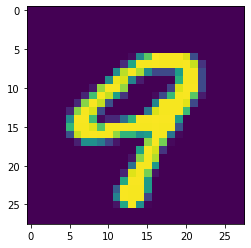

In [12]:
img = x_train[np.random.randint(len(x_train))]
plt.imshow(img)

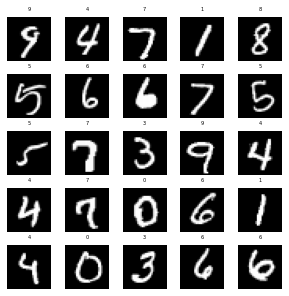

In [23]:
height = 5
width = 5
fig, axis = plt.subplots(height, width, figsize=(5, 5))
for h in range(height):
  for w in range(width):
    ind = np.random.randint(len(x_train))
    img = x_train[ind]
    axis[h][w].imshow(img, cmap='gray')
    axis[h][w].axis('off')
    axis[h][w].set_title(y_train[ind], fontsize=5)

plt.subplots_adjust(hspace=0.3)

#linear Autoencoder

In [30]:
x_train = x_train.reshape(x_train.shape[0], -1) / 255
x_test = x_test.reshape(x_test.shape[0], -1) / 255

Model Sequence order
784 - 128 - 64 - 32 - 64 - 128 - 784

In [50]:
autoencoder = tf.keras.Sequential()

#Encode
autoencoder.add(tf.keras.layers.Dense(units=128, activation='relu', input_dim=784, name='Dense_1'))
autoencoder.add(tf.keras.layers.Dense(units=64, activation='relu', name='Dense_2'))
autoencoder.add(tf.keras.layers.Dense(units=32, activation='relu', name='Dense_3'))

#Decode
autoencoder.add(tf.keras.layers.Dense(units=64, activation='relu', name='Dense_4'))
autoencoder.add(tf.keras.layers.Dense(units=128, activation='relu', name='Dense_5'))
autoencoder.add(tf.keras.layers.Dense(units=784, activation='sigmoid', name='Dense_6'))


In [51]:
autoencoder.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 128)               100480    
                                                                 
 Dense_2 (Dense)             (None, 64)                8256      
                                                                 
 Dense_3 (Dense)             (None, 32)                2080      
                                                                 
 Dense_4 (Dense)             (None, 64)                2112      
                                                                 
 Dense_5 (Dense)             (None, 128)               8320      
                                                                 
 Dense_6 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-tr

In [52]:
autoencoder.compile(optimizer='Adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

In [ ]:
autoencoder.fit(x_train, x_train, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1548 - accuracy: 0.0122
Epoch 2/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1112 - accuracy: 0.0128
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1025 - accuracy: 0.0124
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0979 - accuracy: 0.0131
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0951 - accuracy: 0.0137
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0933 - accuracy: 0.0137
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0922 - accuracy: 0.0135
Epoch 8/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0913 - accuracy: 0.0133
Epoch 9/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0905 - accuracy: 0.0140
Epoch 10/100
1875/1875 [==============================] - 8s 4ms/step - l

###Encoder

In [ ]:
encoder = tf.keras.Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('dense_3').output)

In [ ]:
test_img = x_test[20]
encoded_img = encoder.predict(test_img.reshape(1, -1))
encoded_img.shape

In [ ]:
plt.imshow(encoded_img.reshape(8, 4), cmap='gray')

###Decoder

In [ ]:

input_layer_decoder = tf.keras.layers.Input(shape=(32, ))
decoder_layer1 = autoencoder.get_layer('dense_4')
decoder_layer2 = autoencoder.get_layer('dense_5')
decoder_layer3 = autoencoder.get_layer('dense_6')

decoder = tf.keras.Model(inputs=tf.keras.layers.Input(32,), outputs=decoder_layer3(decoder_layer2(decoder_layer1(input_decoder_layer))))
decoder.summary()